<a href="https://colab.research.google.com/github/yleessam/hipython_rep/blob/main/19_%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5_%ED%86%B5%EC%8B%A0%EC%82%AC%EA%B3%A0%EA%B0%9D%EC%9D%B4%ED%83%88_%EB%B0%B0%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 데이터분석 실습

# 순서
0. 데이터 확인
1. 필요 라이브러리 임포트 및 파일 읽어오기
2. EDA 탐색적 데이터 분석
3. 데이터 전처리 수행
 - 필요한 컬럼 정리
 - 컬럼 데이터 정제
 - Null 처리
 - 컬럼 type 변경하기
4. 데이터 시각화
5. 결과 저장

# #0. 데이터의 확인

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

- 통신사 고객 데이터를 분석해서 고객을 유지하고 고객 이탈률을 줄이기 위한 전략을 탐색한다.

- Churn은 서비스를 중단하거나 업계의 경쟁업체로 이전한 고객 또는 사용자를 의미하는데, 목표는 기존 고객을 유지하고 새로운 고객을 유치하는 것입니다.

- 이 과정을 통해 우리는 정확한 고객이탈 예측 모델을 개발할 수 있습니다.

# * Telco Customer Churn Dataset  컬럼
(Telco는 미국 통신사,,미국데이터)
---


1. CustomerID: Customer ID unique for each customer
2. gender: Whether the customer is a male or a female
3. SeniorCitizen: Whether the customer is a senior citizen or not (1, 0) : 고령자 여부
4. Partner: Whether the customer has a partner or not (Yes, No)
5. Dependents: Whether the customer has dependents or not (Yes, No) : 부양가족 여부
6. Tenure: Number of months the customer has stayed with the company : 서비스 사용 개월수
7. PhoneService: Whether the customer has a phone service or not (Yes, No) - 유선전화 유무
8. MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service) - 유선전화o&회선여러개,유선전화o&회선=1개,유선전화x
9. InternetService: Customer’s internet service provider (DSL, Fiber optic, No) - DSL:초고속(광보단 저렴), Fiber optic:광케이블(속도 매우빠름, 요금도 비쌈), NO : 인터넷 서비스 이용 x
10. OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
12. DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract: The contract term of the customer (Month-to-month, One year, Two years) - Not잔여계약기간
17. PaperlessBilling: Whether the customer has paperless billing or not (Yes, No) - Yes:이메일로, No:종이고지서로
18. PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) -Electroni,Mailed : 수동 Bank,Credit : 자동
19. MonthlyCharges: The amount charged to the customer monthly
20. TotalCharges: The total amount charged to the customer - 통신사 가입 이후 지금까지 납부한 요금
21. Churn: Whether the customer churned or not (Yes or No) : 이탈 여부- Y:이탈, N:이탈x

# #1. 필요 라이브러리 임포트 및 파일 읽어오기

In [1]:
import numpy as np


In [2]:
import pandas as pd


## CSV 파일 데이터 읽어오기

In [3]:
df = pd.read_csv('./data/cust_data_v1.csv')

In [4]:
# 읽어온 데이터프레임 확인하기
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# #2. 탐색적 데이터 분석

## 데이터 탐색하기

In [5]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0.0,No,No,8,Yes,Yes,Fiber optic,No,...,NaN,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0.0,No,Yes,22,Yes,Yes,Fiber optic,No,...,NaN,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0.0,No,No,10,No,No phone service,DSL,Yes,...,NaN,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0.0,Yes,No,28,Yes,Yes,Fiber optic,No,...,NaN,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0.0,No,Yes,62,Yes,No,DSL,Yes,...,NaN,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7034 non-null   object 
 2   SeniorCitizen     7042 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7041 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7040 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  3580 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7042.000000,7043.000000,7042.000000
mean,0.162170,32.371149,64.763256
std,0.368633,24.559481,30.091898
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.groupby('Churn').size()

Churn
No     5174
Yes    1869
dtype: int64

In [9]:
df.isnull().sum()

customerID             0
gender                 9
SeniorCitizen          1
Partner                0
Dependents             2
tenure                 0
PhoneService           3
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection    3463
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               1
PaperlessBilling       0
PaymentMethod          1
MonthlyCharges         1
TotalCharges           0
Churn                  0
dtype: int64

In [10]:
# 결측치가 하나라도 있는 행(Row)만 모두 추출
null_rows = df[df.isnull().any(axis=1)]
print(f"결측치가 포함된 전체 행 수: {len(null_rows)}")
display(null_rows.head(10))

결측치가 포함된 전체 행 수: 3472


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0.0,No,No,8,Yes,Yes,Fiber optic,No,...,NaN,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0.0,No,Yes,22,Yes,Yes,Fiber optic,No,...,NaN,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0.0,No,No,10,No,No phone service,DSL,Yes,...,NaN,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0.0,Yes,No,28,Yes,Yes,Fiber optic,No,...,NaN,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0.0,No,Yes,62,Yes,No,DSL,Yes,...,NaN,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
10,9763-GRSKD,Male,0.0,Yes,Yes,13,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No


In [11]:
# DeviceProtection이 NaN인 데이터들만 모아서 
# 그 사람들의 InternetService가 무엇인지 세어보기
print("DeviceProtection이 NaN인 사람들의 인터넷 서비스 현황:")
print(df[df['DeviceProtection'].isnull()]['InternetService'].value_counts())

DeviceProtection이 NaN인 사람들의 인터넷 서비스 현황:
InternetService
Fiber optic    1501
DSL            1214
No              748
Name: count, dtype: int64


## 자료구조 파악

In [12]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

## 데이터 타입, 인덱스, 컬럼명, Values 확인

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7034 non-null   object 
 2   SeniorCitizen     7042 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7041 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7040 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  3580 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
df.groupby('Churn').size() #해지 O : 1869, X : 5174

Churn
No     5174
Yes    1869
dtype: int64

## Null 데이터 확인

In [16]:
df.isnull().sum()

customerID             0
gender                 9
SeniorCitizen          1
Partner                0
Dependents             2
tenure                 0
PhoneService           3
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection    3463
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               1
PaperlessBilling       0
PaymentMethod          1
MonthlyCharges         1
TotalCharges           0
Churn                  0
dtype: int64

In [17]:
# 결측치 개수와 비율을 한눈에 보기
null_info = pd.DataFrame({
    'Null Count': df.isnull().sum(),
    'Null Percentage': (df.isnull().sum() / len(df)) * 100
})

# 비율이 높은 순서대로 정렬
print(null_info.sort_values(by='Null Percentage', ascending=False))

                  Null Count  Null Percentage
DeviceProtection        3463        49.169388
gender                     9         0.127786
PhoneService               3         0.042595
Dependents                 2         0.028397
SeniorCitizen              1         0.014198
MonthlyCharges             1         0.014198
PaymentMethod              1         0.014198
Contract                   1         0.014198
customerID                 0         0.000000
StreamingTV                0         0.000000
TotalCharges               0         0.000000
PaperlessBilling           0         0.000000
StreamingMovies            0         0.000000
OnlineBackup               0         0.000000
TechSupport                0         0.000000
OnlineSecurity             0         0.000000
InternetService            0         0.000000
MultipleLines              0         0.000000
tenure                     0         0.000000
Partner                    0         0.000000
Churn                      0      

In [18]:
# 예: 해지한 사람(Churn='Yes') 중에서 결측치가 유독 많은가? : X >> 애초에 이탈자 비율이 1:3 정도로 유지가 많음.(Churn == 'No')
print(df.groupby('Churn').apply(lambda x: x.isnull().sum()))

       customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
Churn                                                                   
No              0       8              1        0           2       0   
Yes             0       1              0        0           0       0   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
Churn                                                                ...   
No                1              0                0               0  ...   
Yes               2              0                0               0  ...   

       DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
Churn                                                                          
No                 2529            0            0                0         1   
Yes                 934            0            0                0         0   

       PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
Chu

C:\Users\Admin\AppData\Local\Temp\ipykernel_10656\2808785893.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('Churn').apply(lambda x: x.isnull().sum()))


## 통계 정보

In [19]:
df[['MonthlyCharges','tenure']].describe()

,MonthlyCharges,tenure
count,7042.000000,7043.000000
mean,64.763256,32.371149
std,30.091898,24.559481
min,18.250000,0.000000
25%,35.500000,9.000000
50%,70.350000,29.000000
75%,89.850000,55.000000
max,118.750000,72.000000


In [20]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7034,2,Male,3552
Partner,7043,2,No,3641
Dependents,7041,2,No,4932
PhoneService,7040,2,Yes,6358
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,3580,3,No,1549


# #3. 데이터 전처리 수행

## 자료구조 파악

In [21]:
df.duplicated().sum()

0

In [22]:
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [23]:
df.groupby('SeniorCitizen').size() #비율 6:1 정도

SeniorCitizen
0.0    5900
1.0    1142
dtype: int64

## 컬럼 삭제

In [24]:
#불필요한 컬럼 삭제


In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [27]:
df_new = df.drop(columns='customerID') #고객ID는 중요x로 보임.
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df_new.isnull().sum()

gender                 9
SeniorCitizen          1
Partner                0
Dependents             2
tenure                 0
PhoneService           3
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection    3463
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               1
PaperlessBilling       0
PaymentMethod          1
MonthlyCharges         1
TotalCharges           0
Churn                  0
dtype: int64

DeviceProtection 결측치 여부에 따른 이탈률 비교:
Churn             No       Yes
Is_DP_Null                    
False       0.738827  0.261173
True        0.730292  0.269708


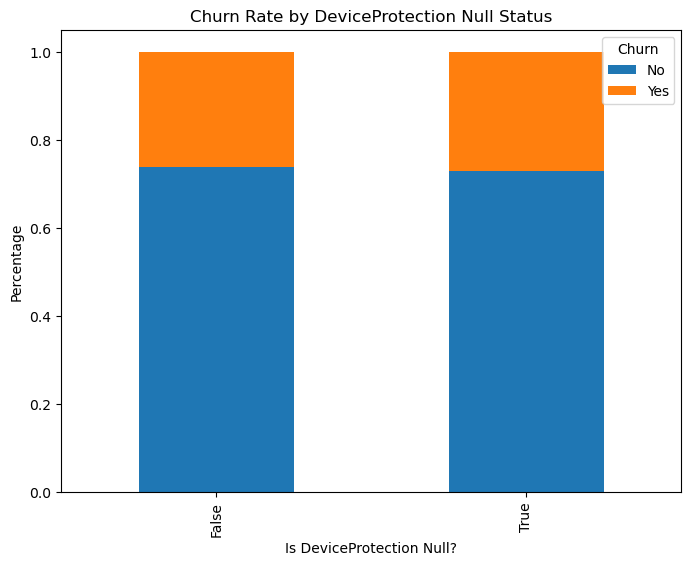

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. DeviceProtection이 Null인지 여부를 나타내는 임시 컬럼 생성
df_new['Is_DP_Null'] = df_new['DeviceProtection'].isnull().astype(str)

# 2. 결측치 여부에 따른 Churn 비율 계산
null_churn_dist = df_new.groupby('Is_DP_Null')['Churn'].value_counts(normalize=True).unstack()
print("DeviceProtection 결측치 여부에 따른 이탈률 비교:")
print(null_churn_dist)

# 3. 시각화
null_churn_dist.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Churn Rate by DeviceProtection Null Status')
plt.xlabel('Is DeviceProtection Null?')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')
plt.show()
# 결과가 3:1에 가까우므로(기존 유지:해지 비율) 이 값을 중요한 데이터x >>> 그냥 드랍

In [30]:
df_new.drop(columns='DeviceProtection', inplace=True)
df_new.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'Is_DP_Null'],
      dtype='object')

In [31]:
# Yes는 1, No는 0으로 치환
binary_cols = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df_new[col] = df_new[col].map({'Yes': 1, 'No': 0})

print("이진 변수 변환 완료!")

이진 변수 변환 완료!


In [32]:
# 범주형 컬럼들만 리스트업
cat_cols = df_new.select_dtypes(include=['object']).columns

for col in cat_cols:
    if col != 'Churn': 
        print(f"\n--- [{col}] 별 해지율 (%) ---")
        
        # 1. Churn의 평균을 구해 해지율 계산 (1이 해지이므로 평균이 곧 해지율)
        # 2. 내림차순 정렬(ascending=False)로 위험 그룹을 상단에 배치
        # 3. 소수점 둘째 자리까지 반올림
        churn_rate = (df_new.groupby(col)['Churn'].mean() * 100).sort_values(ascending=False).round(2)
        
        print(churn_rate)
        print("-" * 30)


--- [gender] 별 해지율 (%) ---
gender
Female    26.97
Male      26.15
Name: Churn, dtype: float64
------------------------------

--- [PhoneService] 별 해지율 (%) ---
PhoneService
Yes    26.69
No     24.93
Name: Churn, dtype: float64
------------------------------

--- [MultipleLines] 별 해지율 (%) ---
MultipleLines
Yes                 28.61
No                  25.04
No phone service    24.93
Name: Churn, dtype: float64
------------------------------

--- [InternetService] 별 해지율 (%) ---
InternetService
Fiber optic    41.89
DSL            18.96
No              7.40
Name: Churn, dtype: float64
------------------------------

--- [OnlineSecurity] 별 해지율 (%) ---
OnlineSecurity
No                     41.77
Yes                    14.61
No internet service     7.40
Name: Churn, dtype: float64
------------------------------

--- [OnlineBackup] 별 해지율 (%) ---
OnlineBackup
No                     39.93
Yes                    21.53
No internet service     7.40
Name: Churn, dtype: float64
----------------------

In [33]:
results = []

# 범주형 컬럼들만 리스트업
cat_cols = df_new.select_dtypes(include=['object']).columns

for col in cat_cols:
    if col == 'Churn': continue
    
    # 1. Churn이 숫자이므로 mean()을 구하면 바로 '이탈률'이 됩니다. (1의 비중)
    # 2. unstack()['Yes'] 대신 이 방식을 쓰면 에러가 절대 안 납니다.
    rates = df_new.groupby(col)['Churn'].mean() * 100
    
    # 항목 간 최대 차이 계산
    diff = rates.max() - rates.min()
    
    # 결과 저장
    results.append({'column': col, 'diff': diff, 'rates': rates})

# 결과 확인: 영향력(diff)이 큰 순서대로 출력
import pandas as pd
results_df = pd.DataFrame(results).sort_values(by='diff', ascending=False)

# 보기 좋게 출력
for index, row in results_df.iterrows():
    print(f"\n[{row['column']}] (최대 차이: {row['diff']:.2f}%)")
    print(row['rates'].sort_values(ascending=False).round(2))
    print("-" * 30)


[TotalCharges] (최대 차이: 100.00%)
TotalCharges
2250.65    100.0
1531.4     100.0
1900.25    100.0
688.65     100.0
190.05     100.0
           ...  
2962         0.0
2961.4       0.0
2960.1       0.0
296.15       0.0
999.9        0.0
Name: Churn, Length: 6531, dtype: float64
------------------------------

[Contract] (최대 차이: 39.89%)
Contract
Month-to-month    42.72
One year          11.27
Two year           2.83
Name: Churn, dtype: float64
------------------------------

[InternetService] (최대 차이: 34.49%)
InternetService
Fiber optic    41.89
DSL            18.96
No              7.40
Name: Churn, dtype: float64
------------------------------

[OnlineSecurity] (최대 차이: 34.36%)
OnlineSecurity
No                     41.77
Yes                    14.61
No internet service     7.40
Name: Churn, dtype: float64
------------------------------

[TechSupport] (최대 차이: 34.23%)
TechSupport
No                     41.64
Yes                    15.17
No internet service     7.40
Name: Churn, dtype: float64


In [34]:
# MultipleLines:3.683209, PhoneService:1.764097, 
# Is_DP_Null:0.853516., gender   0.812981 
# 이 4 컬럼은 변별력 x > 삭제

cols_to_drop = ['MultipleLines', 'PhoneService', 'Is_DP_Null', 'gender']
df_new.drop(columns=cols_to_drop, inplace=True)
df_new.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 컬럼 내용 변경하기

범주형 문자 데이터를 숫자 변환하는것은 성능에 많은 영향을 미치므로 꼭 변환한다.<br>
null, _ 같은 문제있는 문자 데이터를 모델링하기 전에 미리 다른 데이터로 변경, 혹은 삭제한다.

- TotalCharges 컬럼 타입 변경하기

In [35]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7042 non-null   float64
 1   Partner           7043 non-null   int64  
 2   Dependents        7041 non-null   float64
 3   tenure            7043 non-null   int64  
 4   InternetService   7043 non-null   object 
 5   OnlineSecurity    7043 non-null   object 
 6   OnlineBackup      7043 non-null   object 
 7   TechSupport       7043 non-null   object 
 8   StreamingTV       7043 non-null   object 
 9   StreamingMovies   7043 non-null   object 
 10  Contract          7042 non-null   object 
 11  PaperlessBilling  7043 non-null   int64  
 12  PaymentMethod     7042 non-null   object 
 13  MonthlyCharges    7042 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   int64  
dtypes: float64(3), int64(4), object(9)
memory 

- Churn 컬럼의 문자열값을 숫자로 변경

In [36]:
# errors='coerce'를 쓰면 숫자가 아닌 값은 NaN이 됩니다. 
# 그 NaN인 녀석들만 필터링해서 원본에 뭐가 들어있었는지 확인해봅시다.
temp_numeric = pd.to_numeric(df_new['TotalCharges'], errors='coerce')
bad_data = df_new[temp_numeric.isnull()]['TotalCharges']

print("숫자로 변환되지 않는 데이터들:")
print(bad_data.unique()) # 어떤 값들이 섞여있는지 고유값 확인
print(f"\n문제 데이터 개수: {len(bad_data)}개")

숫자로 변환되지 않는 데이터들:
[' ']

문제 데이터 개수: 11개


In [37]:
# 공백인 데이터 11개의 tenure 확인 > 결과 신규여서 값이 공백으로 처리 >>> 이 null값들을 0으로 바꾸기
print(df_new[df_new['TotalCharges'] == ' ']['tenure']) 

488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: tenure, dtype: int64


In [38]:
# 1. ' ' 공백을 숫자로 변환 (숫자로 못 바꾸는 공백은 NaN이 됨)
df_new['TotalCharges'] = pd.to_numeric(df_new['TotalCharges'], errors='coerce')

# 2. NaN(공백이었던 것)을 0으로 채우기
df_new['TotalCharges'] = df_new['TotalCharges'].fillna(0)

# 3. 최종 타입 확인
print(f"TotalCharges의 현재 타입: {df_new['TotalCharges'].dtype}")

TotalCharges의 현재 타입: float64


## Null 데이터 확인

In [39]:
df_new.isnull().sum() 
# Contract, PaymentMethod, MonthlyCharges 결과는 확인해보고 결정하기, 나머지는 최빈값으로 대체하기.

SeniorCitizen       1
Partner             0
Dependents          2
tenure              0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            1
PaperlessBilling    0
PaymentMethod       1
MonthlyCharges      1
TotalCharges        0
Churn               0
dtype: int64

In [40]:
df_new[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7042.000000,7043.000000
mean,32.371149,64.763256,2279.734304
std,24.559481,30.091898,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [41]:
df_new.describe(include='object').T

,count,unique,top,freq
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
TechSupport,7043,3,No,3473
StreamingTV,7043,3,No,2810
StreamingMovies,7043,3,No,2785
Contract,7042,3,Month-to-month,3874
PaymentMethod,7042,4,Electronic check,2365


- 결측치 처리

데이터에 결측치 있으면 모델링시 알지 못하는 에러 발생할수 있으므로 반드시 결측치를 제거나 변경해야 한다.<br>
결측치 제거시 dropna() 함수 활용하면 된다.<br>
결측치를 변경시 변경하는 방법이 꼭 정답이 아니며, 여러가지 판단하고 고민이 필요하다.<br>
주로, 문자형 컬럼에 대해 최빈값으로 , 숫자형 컬럼에 대해 중간값으로 결측치 대신해서 채울수 있다.

In [42]:
# 결측치가 하나라도 있는 행들만 골라내기
null_rows = df_new[df_new['Contract'].isnull() | 
                   df_new['PaymentMethod'].isnull() | 
                   df_new['MonthlyCharges'].isnull()]

display(null_rows)

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,1,0.0,1,DSL,No,Yes,No,No,No,NaN,1,Electronic check,29.85,29.85,0
93,0.0,0,0.0,65,Fiber optic,Yes,Yes,No,Yes,Yes,Month-to-month,1,NaN,111.05,7107.00,0
2961,0.0,0,0.0,12,DSL,No,Yes,Yes,No,No,Month-to-month,1,Mailed check,NaN,648.65,0


In [43]:
# 동일 조건의 표본 5명 추출
sample_check = df_new[
    (df_new['InternetService'] == 'DSL') & 
    (df_new['OnlineSecurity'] == 'No') & 
    (df_new['OnlineBackup'] == 'Yes') & 
    (df_new['TechSupport'] == 'Yes') & 
    (df_new['StreamingTV'] == 'No') & 
    (df_new['StreamingMovies'] == 'No')
].head(5)

# 요금 관련 컬럼만 출력해서 비교
print("--- 서비스 조합이 같은 고객들의 실제 요금 표본 ---")
display(sample_check[['MonthlyCharges', 'TotalCharges', 'tenure']])
# 그냥 TotalCharges/tenure 을 MonthlyCharges해도 상관없어보임! 2961> 54.05값으로

--- 서비스 조합이 같은 고객들의 실제 요금 표본 ---


,MonthlyCharges,TotalCharges,tenure
23,59.90,3505.10,58
340,54.65,1830.10,32
569,40.40,422.60,11
571,59.60,2754.00,47
1486,55.05,102.75,2


In [44]:
# 1. 2961번 고객 요금 직접 수정
df_new.loc[2961, 'MonthlyCharges'] = 54.05
df_new.isnull().sum()

SeniorCitizen       1
Partner             0
Dependents          2
tenure              0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            1
PaperlessBilling    0
PaymentMethod       1
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [45]:
df_new.groupby('PaymentMethod').size()

PaymentMethod
Bank transfer (automatic)    1544
Credit card (automatic)      1521
Electronic check             2365
Mailed check                 1612
dtype: int64

In [46]:
# 2. 나머지 결측치(Contract, PaymentMethod 등)는 가장 흔한 값으로 채우기
# (이미 정밀 분석하신 936번, 0번도 이 타이밍에 같이 처리하시면 좋습니다)
df_new['Contract'] = df_new['Contract'].fillna(df_new['Contract'].mode()[0])
df_new['PaymentMethod'] = df_new['PaymentMethod'].fillna(df_new['PaymentMethod'].mode()[0])

# 3. 전체 결측치 최종 확인
print("결측치 처리 결과:")
print(df_new.isnull().sum())

결측치 처리 결과:
SeniorCitizen       1
Partner             0
Dependents          2
tenure              0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [47]:
# 1. SeniorCitizen 결측치 채우기 (보통 0 또는 1 중 더 많은 값으로 채워짐)
sc_mode = df_new['SeniorCitizen'].mode()[0]
df_new['SeniorCitizen'] = df_new['SeniorCitizen'].fillna(sc_mode)

# 2. Dependents 결측치 채우기 (보통 'Yes' 또는 'No' 중 더 많은 값으로 채워짐)
dep_mode = df_new['Dependents'].mode()[0]
df_new['Dependents'] = df_new['Dependents'].fillna(dep_mode)

In [48]:
df_new.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [49]:
df_new.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,1,0.0,1,DSL,No,Yes,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0.0,0,0.0,34,DSL,Yes,No,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0.0,0,0.0,2,DSL,Yes,Yes,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0.0,0,0.0,45,DSL,Yes,No,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0.0,0,0.0,2,Fiber optic,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [50]:
df_new.head(3), df_new.nunique()

(   SeniorCitizen  Partner  Dependents  tenure InternetService OnlineSecurity  \
 0            0.0        1         0.0       1             DSL             No   
 1            0.0        0         0.0      34             DSL            Yes   
 2            0.0        0         0.0       2             DSL            Yes   
 
   OnlineBackup TechSupport StreamingTV StreamingMovies        Contract  \
 0          Yes          No          No              No  Month-to-month   
 1           No          No          No              No        One year   
 2          Yes          No          No              No  Month-to-month   
 
    PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  Churn  
 0                 1  Electronic check           29.85         29.85      0  
 1                 0      Mailed check           56.95       1889.50      0  
 2                 1      Mailed check           53.85        108.15      1  ,
 SeniorCitizen          2
 Partner                2
 Depend

In [51]:
# OnlineSecurity	OnlineBackup	TechSupport	StreamingTV	StreamingMovies 이 값들은 값이 3개 > 그런데 groupby로 InternetService를 기준으로 하면 내가 원하는 형태로 보여줄 수 있을것같음. >>> OnlineSecurity OnlineBackup TechSupport StreamingTV 	StreamingMovies 이 값들에 대한 데이터 값을 보려면 groupby('InternetService') 해야 No값들이 의미있게 됨.

In [52]:
# 인터넷 서비스 종류별로 온라인 보안 서비스 값이 어떻게 분포하는지 표로 작성 >> 결과 보니깐 groupby('InternetService')해도 됨.
pd.crosstab(df_new['InternetService'], df_new['OnlineSecurity'])

OnlineSecurity,No,No internet service,Yes
InternetService,,,
DSL,1241,0,1180
Fiber optic,2257,0,839
No,0,1526,0


In [53]:
df_new.head(3)

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,1,0.0,1,DSL,No,Yes,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0.0,0,0.0,34,DSL,Yes,No,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0.0,0,0.0,2,DSL,Yes,Yes,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1


In [54]:
# 'Month-to-month'면 1, 아니면(1년/2년 계약) 0인 새로운 칼럼 생성
df_new['Is_MonthToMonth'] = df_new['Contract'].apply(lambda x: 1 if x == 'Month-to-month' else 0)

# 확인
print(df_new[['Contract', 'Is_MonthToMonth']].head(5))

         Contract  Is_MonthToMonth
0  Month-to-month                1
1        One year                0
2  Month-to-month                1
3        One year                0
4  Month-to-month                1


In [55]:
# 1. 대상 컬럼 리스트 정의
addon_cols = ['OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# 2. 'Yes'는 1로, 그 외(No, No internet service)는 0으로 변환
for col in addon_cols:
    df_new[col] = df_new[col].apply(lambda x: 1 if x == 'Yes' else 0)

# 3. 결과 확인 (제대로 바뀌었는지 5개만 출력)
print("--- 변환 후 데이터 확인 ---")
display(df_new[addon_cols].head())

# 4. 빈도수 확인 (0과 1로만 구성되어 있는지 체크)
print("\n--- 값 분포 확인 ---")
for col in addon_cols:
    print(df_new[col].value_counts())
    print("-" * 20)

--- 변환 후 데이터 확인 ---


,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies
0,0,1,0,0,0
1,1,0,0,0,0
2,1,1,0,0,0
3,1,0,1,0,0
4,0,0,0,0,0



--- 값 분포 확인 ---
OnlineSecurity
0    5024
1    2019
Name: count, dtype: int64
--------------------
OnlineBackup
0    4614
1    2429
Name: count, dtype: int64
--------------------
TechSupport
0    4999
1    2044
Name: count, dtype: int64
--------------------
StreamingTV
0    4336
1    2707
Name: count, dtype: int64
--------------------
StreamingMovies
0    4311
1    2732
Name: count, dtype: int64
--------------------


In [56]:
df_new['SeniorCitizen'].nunique()

2

In [57]:
df_new.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Is_MonthToMonth     0
dtype: int64

# #4. 시각화

## 라이브러리 임포트

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

## Bar 차트

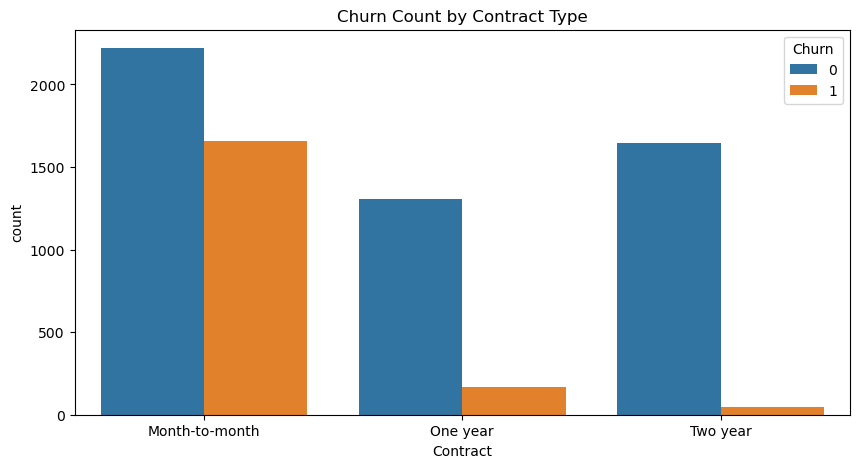

In [59]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_new, x='Contract', hue='Churn')
plt.title('Churn Count by Contract Type')
plt.show()
#1,2year에 비해 Month-to-month인 경우 해지율이 높았다.

C:\Users\Admin\AppData\Local\Temp\ipykernel_10656\1106994522.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_new, x=col, y='Churn', palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_10656\1106994522.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_new, x=col, y='Churn', palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_10656\1106994522.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_new, x=col, y='Churn', palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_10656\11069

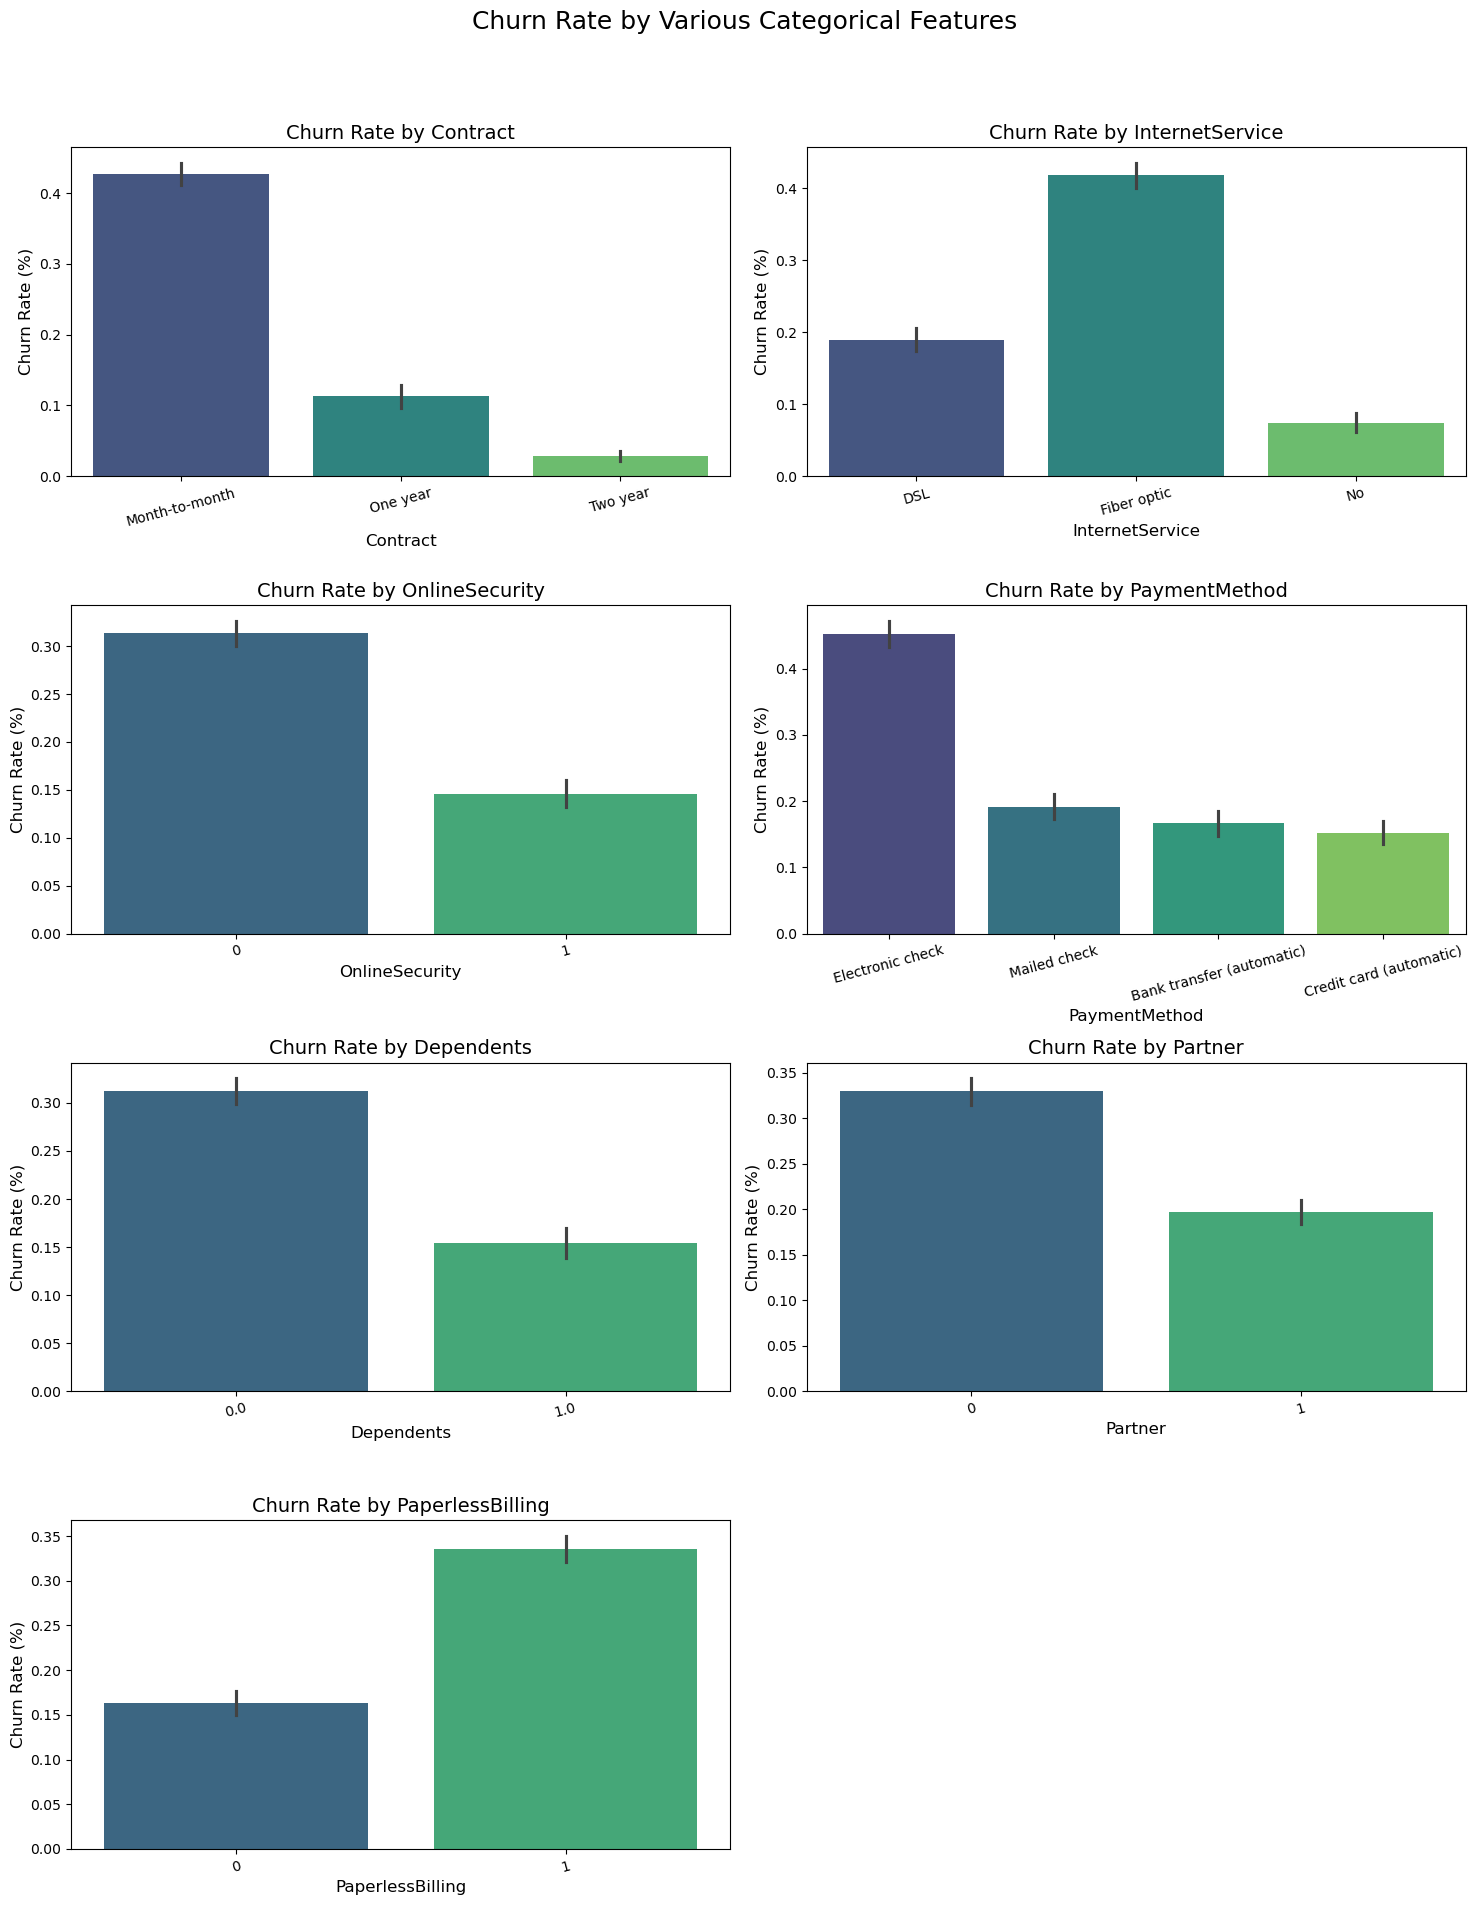

In [62]:
# 시각화할 범주형 컬럼 리스트 (영향력이 큰 순서대로 배치하면 좋아요!)
# df_new.select_dtypes(include=['object']).columns 에서 'Churn' 제외
# 필요에 따라 다른 컬럼들도 추가/제외 가능
target_categorical_cols = [
    'Contract',         # 계약 형태 (가장 중요!)
    'InternetService',  # 인터넷 서비스 종류
    'OnlineSecurity',   # 온라인 보안
    'PaymentMethod',    # 결제 방식
    'Dependents',       # 부양 가족
    'Partner',          # 배우자 유무
    'PaperlessBilling'  # 전자 청구서
]

# 한 페이지에 여러 그래프 그리기
plt.figure(figsize=(15, 20)) # 전체 Figure 크기 조정
plt.suptitle('Churn Rate by Various Categorical Features', fontsize=18, y=0.98) # 전체 제목

for i, col in enumerate(target_categorical_cols):
    plt.subplot(len(target_categorical_cols) // 2 + 1, 2, i + 1) # 2열로 배치
    
    # barplot 사용: y='Churn' 지정 시 자동으로 해지율(평균) 계산
    sns.barplot(data=df_new, x=col, y='Churn', palette='viridis')
    plt.title(f'Churn Rate by {col}', fontsize=14)
    plt.ylabel('Churn Rate (%)', fontsize=12) # y축 레이블
    plt.xlabel(col, fontsize=12) # x축 레이블
    plt.xticks(rotation=15) # x축 라벨이 길 경우 살짝 기울이기

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 그래프 간격 조정 및 전체 제목 공간 확보
plt.show()

In [ ]:
# 칼럼별로 그래프를 통해 확인하니 
# 계약기간을 정하지않은 경우(Month-to-month), 비싼 인터넷요금제(Fiber obtic), online security 부가서비스를 가입한경우, Electronic check를 한경우(수동결제), 부양가족과 파트너가 없는 경우, 종이요금고지서를 받는 경우가 상대적으로 해지율이 높게 나타났다.

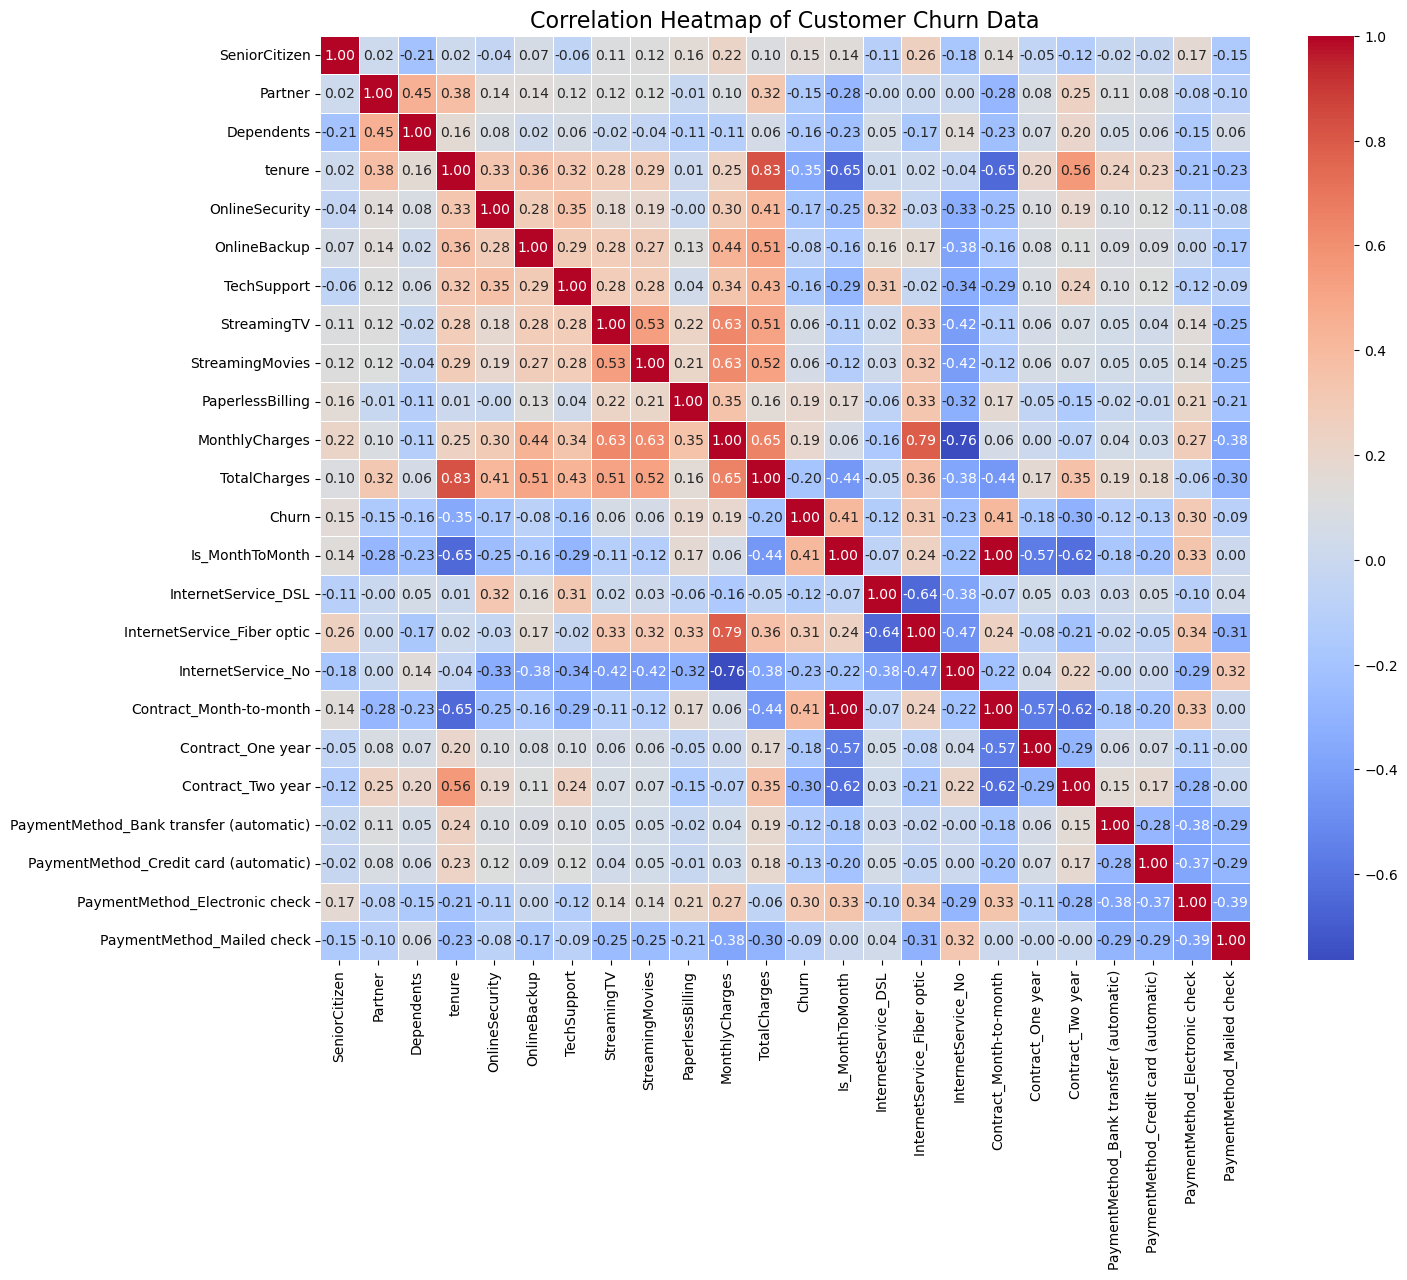

In [63]:
# 1. 상관분석을 위한 임시 데이터프레임 생성
# 문자열 컬럼들을 원-핫 인코딩으로 숫자화합니다.
df_corr = pd.get_dummies(df_new)

# 2. 상관계수 행렬 계산
corr_matrix = df_corr.corr()

# 3. 히트맵 그리기
plt.figure(figsize=(15, 12)) # 변수가 많으므로 크기를 넉넉하게 잡습니다.

# sns.heatmap의 주요 옵션:
# - annot=True: 칸 안에 숫자 표시
# - cmap='coolwarm': 높은 상관관계는 빨간색, 낮은 것은 파란색
# - fmt='.2f': 소수점 둘째 자리까지 표시
# - linewidths=0.5: 칸 사이 간격
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of Customer Churn Data', fontsize=16)
plt.show()

In [ ]:
# 위 히트맵에서 유심히 봐야 할 곳은 Churn 부분이다. 어떤 부분이 Churn과 상관성이 높은지 보고 높은 부분이 이탈율이 높은 고객의 특성이니 잘 관리해야한다.특히 Month-to-month인 경우가 이탈율과 상관성이 가장 높으므로 이 고객들을 대상으로 집중 관리가 필요해보인다.이후로는 비싼 인터넷 요금제 사용고객, Electronic_check 방식으로 결제하는 고객이 보인다. 그리고 계약을 오래 유지한 고객일 수록 해지를 덜 하는 경향이있으므로 계약을 오래 유지 할 수 있는 유인을 만들어야겠다.

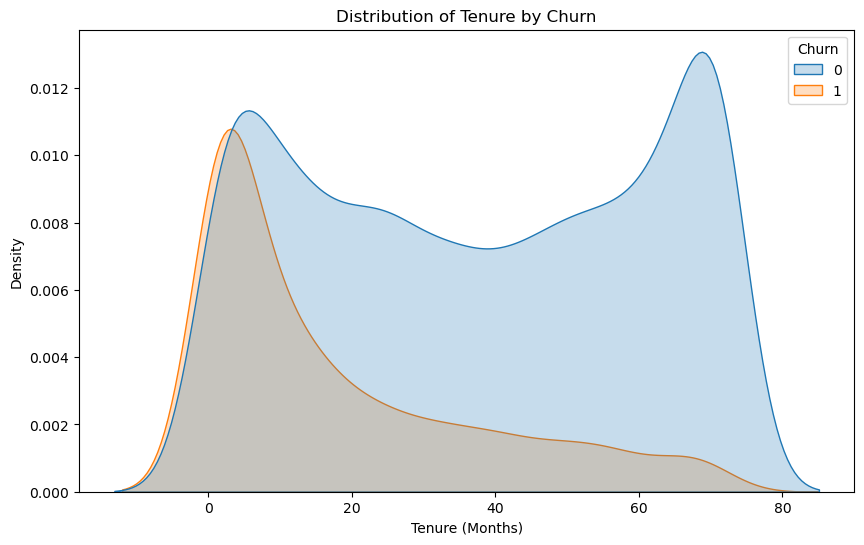

In [64]:
plt.figure(figsize=(10, 6))
# tenure(가입 기간)에 따른 Churn 분포 확인
sns.kdeplot(data=df_new, x='tenure', hue='Churn', fill=True)
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure (Months)')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10656\3615991774.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_new[df_new['Churn'] == 0]['MonthlyCharges'], label='Not Churn', shade=True, color='blue')
C:\Users\Admin\AppData\Local\Temp\ipykernel_10656\3615991774.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_new[df_new['Churn'] == 1]['MonthlyCharges'], label='Churn', shade=True, color='red')


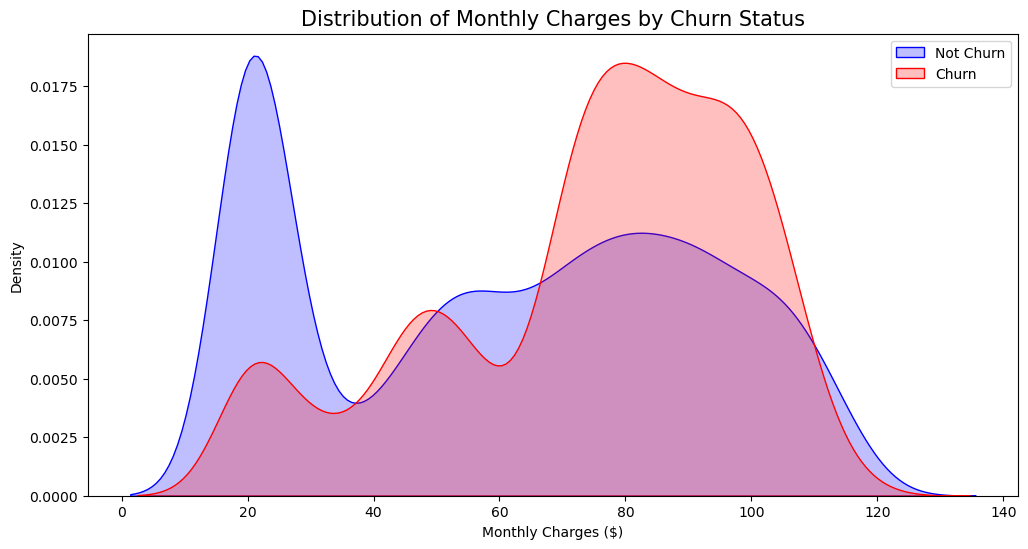

C:\Users\Admin\AppData\Local\Temp\ipykernel_10656\3615991774.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_new, x='ChargeGroup', y='Churn', palette='Reds')


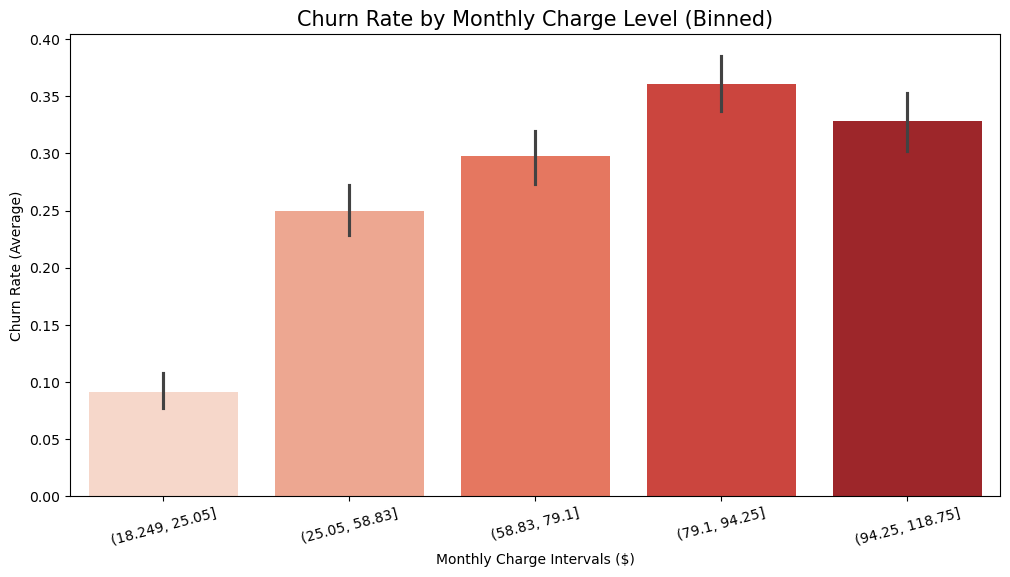

--- 구간별 상세 해지율 ---
ChargeGroup
(18.249, 25.05]     9.154930
(25.05, 58.83]     24.982105
(58.83, 79.1]      29.766123
(79.1, 94.25]      36.105188
(94.25, 118.75]    32.812500
Name: Churn, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_10656\3615991774.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_new.groupby('ChargeGroup')['Churn'].mean().sort_index() * 100)


In [65]:
# 1. 요금 분포 시각화 (KDE Plot)
# 해지한 사람과 유지한 사람의 요금 분포가 어떻게 다른지 곡선으로 보여줍니다.
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_new[df_new['Churn'] == 0]['MonthlyCharges'], label='Not Churn', shade=True, color='blue')
sns.kdeplot(data=df_new[df_new['Churn'] == 1]['MonthlyCharges'], label='Churn', shade=True, color='red')
plt.title('Distribution of Monthly Charges by Churn Status', fontsize=15)
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Density')
plt.legend()
plt.show()

# 2. 요금 구간별 이탈률 시각화 (Binned Bar Plot)
# 요금을 5개 구간으로 나누어 각 구간의 '진짜 이탈률'을 계산합니다.
df_new['ChargeGroup'] = pd.qcut(df_new['MonthlyCharges'], q=5) # 5등분 (Low ~ High)

plt.figure(figsize=(12, 6))
# y축에 Churn(0, 1)을 넣으면 자동으로 평균(이탈률)을 계산합니다.
sns.barplot(data=df_new, x='ChargeGroup', y='Churn', palette='Reds')
plt.title('Churn Rate by Monthly Charge Level (Binned)', fontsize=15)
plt.xlabel('Monthly Charge Intervals ($)')
plt.ylabel('Churn Rate (Average)')
plt.xticks(rotation=15)
plt.show()

# 3. 실제 구간별 수치 확인
print("--- 구간별 상세 해지율 ---")
print(df_new.groupby('ChargeGroup')['Churn'].mean().sort_index() * 100)

- 불균형 심한 PhoneService 컬럼 삭제

In [60]:
# 이미 삭제..

## 숫자형 컬럼에 대한 시각화

- Churn 컬럼

- SeniorCitizen 컬럼

## Histgram

In [61]:
# seaborn 라이브러리 임포트
#!pip install seaborn

import seaborn as sns

- tenure 컬럼

- TotalCharges 컬럼

## Countplot

## heatmap

## boxplot

# # 5. 결과 저장하기

## 결과를 csv 파일로 저장하기

# #X. 랩업
1. 필요 라이브러리 임포트 및 파일 읽어오기 : pd.read_csv()
2. EDA (Exploratory Data Analysis) 탐색적 데이터 분석 : df.info(), df.head(), df.tail()
3. 데이터 전처리 수행
 + 불필요 컬럼 삭제 : df.drop()
 + 컬럼 내용 변경하기 : df.replace()
 + Null 처리 : df.replace(), df.fillna()
 + 컬럼 type 변경하기 : df['col'].astype(int)
4. 시각화
 + matplotlib, seaborn
 + bar, scatter, countplot, boxplot
5. 결과 저장하기
 + to_csv()